In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random
from scipy.optimize import curve_fit

import h5py
from IPython.utils import io

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [5]:
bdf_discharge = load_dir(dirname='/data/new_trap/20200320/Bead1/Discharge/Discharge_after_Mass_20200402/After_spinning_again_20200403/', 
                         start_file=0, max_file=1200)

530  files in folder
530  files loaded


In [6]:
def correlation(drive, response, fsamp, fdrive, filt = False, band_width = 1):
    '''Compute the full correlation between drive and response,
       correctly normalized for use in step-calibration.

       INPUTS:   drive, drive signal as a function of time
                 response, resposne signal as a function of time
                 fsamp, sampling frequency
                 fdrive, predetermined drive frequency
                 filt, boolean switch for bandpass filtering
                 band_width, bandwidth in [Hz] of filter

       OUTPUTS:  corr_full, full and correctly normalized correlation'''

    ### First subtract of mean of signals to avoid correlating dc
    drive = drive-np.mean(drive)
    response = response-np.mean(response)

    ### bandpass filter around drive frequency if desired.
    if filt:
        b, a = signal.butter(3, [2.*(fdrive-band_width/2.)/fsamp, \
                             2.*(fdrive+band_width/2.)/fsamp ], btype = 'bandpass')
        drive = signal.filtfilt(b, a, drive)
        response = signal.filtfilt(b, a, response)
    
    ### Compute the number of points and drive amplitude to normalize correlation
    lentrace = len(drive)
    drive_amp = np.sqrt(2)*np.std(drive)

    ### Define the correlation vector which will be populated later
    corr = np.zeros(int(fsamp/fdrive))

    ### Zero-pad the response
    response = np.append(response, np.zeros(int(fsamp / fdrive) - 1) )

    ### Build the correlation
    n_corr = len(drive)
    for i in range(len(corr)):
        ### Correct for loss of points at end
        correct_fac = 2.0*n_corr/(n_corr-i) ### x2 from empirical test
        corr[i] = np.sum(drive*response[i:i+n_corr])*correct_fac

    return corr * (1.0 / (lentrace * drive_amp))

In [7]:
fdrive=71
nsamp = 50000
fsamp = 5000
sigamp = 1
tarr = np.arange(0, nsamp/fsamp, 1.0/fsamp)
sig = sigamp * np.sin(2.0 * np.pi * fdrive * tarr)

In [8]:
dis_z = [np.std(bb.response_at_freq2('z', drive_freq=71)) for bb in  bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [9]:
corrs = [correlation(drive=sig, response=bb.z2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for bb in bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [8]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux
gfw = GravityFramework.GravityFramework()

In [81]:
m1 = gfw.build_z_response(bdf_discharge, drive_freq=71, charges=10, bandwidth=1, decimate=10, bimodal=True)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
Z2-amplitude:  7.01e+02
reduced chi2:  292.2608140245758
***************************************************
Z2-amplitude:  6.94e+02
reduced chi2:  304.08442315711176
***************************************************
Z2-amplitude:  6.99e+02
reduced chi2:  382.89553505886136
***************************************************
Z2-amplitude:  6.96e+02
reduced chi2:  456.66874789986986
***************************************************
Z2-amplitude:  7.08e+02
reduced chi2:  243.6988321861701
***************************************************
Z2-amplitude:  6.56e+02
reduced chi2:  217.46319828226794
***************************************************
Z2-amplitude:  6.57e+02
reduced chi2:  401.069674030633
***************************************************
Z2-amplitude:  6.66e+02
reduced chi2:  400.3587141113863
***************************************************
Z2-amplitude:  6.72e+02
reduced chi2:  221.88345518513094
***************

***************************************************
Z2-amplitude:  5.73e+02
reduced chi2:  195.38305308751606
***************************************************
Z2-amplitude:  5.74e+02
reduced chi2:  307.13262172913005
***************************************************
Z2-amplitude:  5.36e+02
reduced chi2:  168.73902227784325
***************************************************
Z2-amplitude:  5.42e+02
reduced chi2:  277.3033048511153
***************************************************
Z2-amplitude:  5.46e+02
reduced chi2:  423.5482284589415
***************************************************
Z2-amplitude:  5.48e+02
reduced chi2:  189.58654510731336
***************************************************
Z2-amplitude:  5.45e+02
reduced chi2:  344.1503252650268
***************************************************
Z2-amplitude:  5.33e+02
reduced chi2:  209.87427587627766
***************************************************
Z2-amplitude:  5.30e+02
reduced chi2:  161.10370116436565
*************

***************************************************
Z2-amplitude:  4.44e+02
reduced chi2:  206.24812775740068
***************************************************
Z2-amplitude:  4.60e+02
reduced chi2:  281.817417202891
***************************************************
Z2-amplitude:  4.64e+02
reduced chi2:  172.14285979809833
***************************************************
Z2-amplitude:  4.73e+02
reduced chi2:  173.86532806403739
***************************************************
Z2-amplitude:  4.72e+02
reduced chi2:  266.52496624030584
***************************************************
Z2-amplitude:  4.69e+02
reduced chi2:  254.80879266817394
***************************************************
Z2-amplitude:  4.70e+02
reduced chi2:  316.5603746208858
***************************************************
Z2-amplitude:  4.59e+02
reduced chi2:  257.06790848758556
***************************************************
Z2-amplitude:  4.71e+02
reduced chi2:  167.08392744081243
*************

***************************************************
Z2-amplitude:  1.67e+00
reduced chi2:  103.9630711769981
***************************************************
Z2-amplitude:  4.75e-01
reduced chi2:  144.44801295546912
***************************************************
Z2-amplitude:  3.23e+00
reduced chi2:  164.64770854955134
***************************************************
Z2-amplitude:  2.70e+02
reduced chi2:  136.04073198361132
***************************************************
Z2-amplitude:  2.60e+02
reduced chi2:  208.92549411045115
***************************************************
Z2-amplitude:  2.74e+02
reduced chi2:  73.80041008322668
***************************************************
Z2-amplitude:  2.78e+02
reduced chi2:  199.31639380395447
***************************************************
Z2-amplitude:  2.80e+02
reduced chi2:  188.9971726828299
***************************************************
Z2-amplitude:  2.73e+02
reduced chi2:  99.40556664700068
**************

***************************************************
Z2-amplitude:  1.06e+02
reduced chi2:  93.89447089018437
***************************************************
Z2-amplitude:  9.63e+01
reduced chi2:  83.9363703290609
***************************************************
Z2-amplitude:  9.89e+01
reduced chi2:  105.45600595871757
***************************************************
Z2-amplitude:  9.53e+01
reduced chi2:  123.34679436964117
***************************************************
Z2-amplitude:  9.04e+01
reduced chi2:  93.27149443253265
***************************************************
Z2-amplitude:  9.03e+01
reduced chi2:  87.26150649695369
***************************************************
Z2-amplitude:  2.11e+01
reduced chi2:  85.04034426897053
***************************************************
Z2-amplitude:  1.28e+01
reduced chi2:  82.81749058162265
***************************************************
Z2-amplitude:  1.41e+01
reduced chi2:  93.80358091720369
******************

***************************************************
Z2-amplitude:  1.66e+01
reduced chi2:  85.18468711245352
***************************************************
Z2-amplitude:  3.30e+00
reduced chi2:  105.38252425837264
***************************************************
Z2-amplitude:  3.29e-01
reduced chi2:  137.4854705291184
***************************************************
Z2-amplitude:  6.43e+00
reduced chi2:  89.47356051291906
***************************************************
Z2-amplitude:  5.96e+00
reduced chi2:  174.6268384282876
***************************************************
Z2-amplitude:  3.01e+00
reduced chi2:  122.26611371176706
***************************************************
Z2-amplitude:  8.85e+00
reduced chi2:  160.36671124807606
***************************************************
Z2-amplitude:  3.79e+00
reduced chi2:  62.12488344472995
***************************************************
Z2-amplitude:  3.12e+00
reduced chi2:  182.00514041423384
***************

***************************************************
Z2-amplitude:  8.69e+01
reduced chi2:  288.3820686938395
***************************************************
Z2-amplitude:  9.17e+01
reduced chi2:  206.05169546164396
***************************************************
Z2-amplitude:  1.02e+02
reduced chi2:  139.0605339386089
***************************************************
Z2-amplitude:  9.30e+01
reduced chi2:  117.45748884801483
***************************************************
Z2-amplitude:  9.28e+01
reduced chi2:  312.93653444643047
***************************************************
Z2-amplitude:  8.92e+01
reduced chi2:  150.26802748130376
***************************************************
Z2-amplitude:  8.81e+01
reduced chi2:  108.3947371297751
***************************************************
Z2-amplitude:  8.98e+01
reduced chi2:  137.26288392270575
***************************************************
Z2-amplitude:  8.47e+01
reduced chi2:  155.3275048837274
**************

In [82]:
amps3 = np.array([m_.values[0] for m_ in m1])
amps32 = np.array([m_.values[1] for m_ in m1])
phases3 = [m_.values[3] for m_ in m1]
phases32 = [m_.values[4] for m_ in m1]

<IPython.core.display.Javascript object>


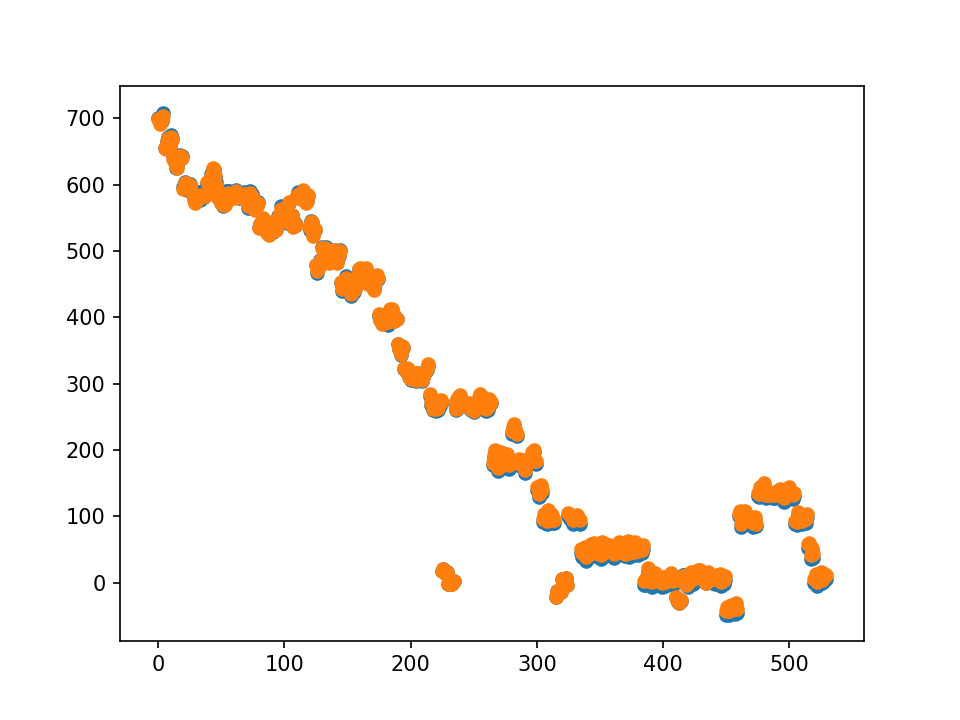

In [85]:
_, ax = plt.subplots()
ax.scatter(range(len(phases)), amps3)
ax.scatter(range(len(phases)), amps1)
# ax.set(ylim=(-3.14, 3.14))

In [130]:
arrrange =  np.arange(20, 50 ,0.01)
residuals = [np.mean((amps/scale_)%1) for scale_ in arrrange]
scale = arrrange[np.argmin(residuals)]
# scale = 10
print(scale*extra_scale, scale)
# _,ax =plt.subplots()
# ax.scatter(arrrange, residuals)
# ax.hist((amps/scale)%1, bins=30)
# ax.hist((amps/scale/extra_scale)%1, bins=30, alpha=0.5)

45.85350000000388 43.6700000000037


<IPython.core.display.Javascript object>


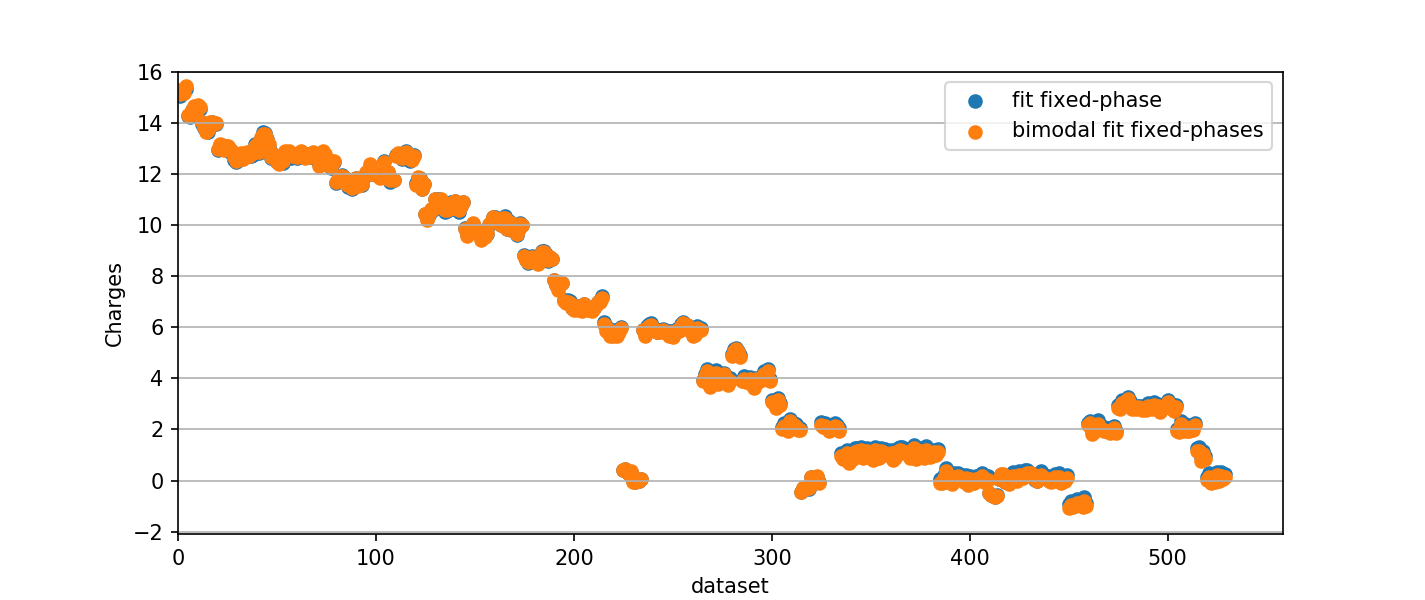

In [132]:
indecies = [np.argmax(cc) for cc in corrs]
max_corr = [np.max(cc) for cc in corrs]
in_phase = [cc[69] for cc in corrs]
extra_scale = 1.05
fig,ax = plt.subplots(figsize=(9.5,4))
# ax.scatter(range(len(max_corr)), max_corr/max_corr[0], label='max-corr')
# ax.scatter(range(len(max_corr)), in_phase/in_phase[0], label='in-phase-corr')
# ax.scatter(range(len(amps)), amps/scale, label='fit')
ax.scatter(range(len(amps1)), amps1/scale/extra_scale, label='fit fixed-phase')
# ax.scatter(range(len(indecies)), amps2/amps2[0]/scale, label='fit fixed-phase + spin')
ax.scatter(range(len(indecies)), amps3/scale/extra_scale, label='bimodal fit fixed-phases')
# ax.scatter(range(len(indecies)), dis_z/dis_z[0])
ax.legend()
ax.set(xlabel='dataset', ylabel='Charges', ylim=(None,16), xlim=(0,None))
ax.grid(axis='y')
ax.legend()
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [39]:
# bdf_discharge = load_dir(dirname='/data/new_trap/20200320/Bead1/Discharge/First_Discharge/', 
#                          start_file=0, max_file=1200)

# bdf_discharge = load_dir(dirname='/data/new_trap/20200316/Bead1/Discharge/', 
#                          start_file=0, max_file=1200)

bdf_discharge = load_dir(dirname='/data/new_trap/20200320/Bead1/Discharge/From_plus_to_minus_and_discharge/', 
                         start_file=650, max_file=50)

1145  files in folder
50  files loaded


In [161]:
fname = r'/data/new_trap/20200320/Bead1/TransFunc/Repeat_TransFunc_20200104/TransFunc_Z_m300k_250s_1hz.h5'
tf_z = BeadDataFile.BeadDataFile(fname=fname)
tf_list = [tf_z]

No height data
No cantilever data
Error loading spinning data
No laser power data


In [40]:
m1 = gfw.build_z_response(bdf_discharge, drive_freq=71, charges=1, bandwidth=1, bimodal=False)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
Z2-amplitude:  1.49e+03
reduced chi2:  3969.8714375951886
***************************************************
Z2-amplitude:  1.50e+03
reduced chi2:  3673.9829371173173
***************************************************
Z2-amplitude:  1.49e+03
reduced chi2:  6051.602261242549
***************************************************
Z2-amplitude:  1.49e+03
reduced chi2:  11153.729524743374
***************************************************
Z2-amplitude:  1.49e+03
reduced chi2:  3826.95458968828
***************************************************
Z2-amplitude:  1.55e+03
reduced chi2:  2646.201478473163
***************************************************
Z2-amplitude:  1.54e+03
reduced chi2:  1887.8311023516949
***************************************************
Z2-amplitude:  1.48e+03
reduced chi2:  11074.939599718746
***************************************************
Z2-amplitude:  1.49e+03
reduced chi2:  1981.1621218190216
**************

In [41]:
amps13 = np.array([m_.values[0] for m_ in m1])
# amps82 = np.array([m_.values[1] for m_ in m1])
# phases11 = [m_.values[2] for m_ in m1]
# phases52 = [m_.values[4] for m_ in m1]

<IPython.core.display.Javascript object>


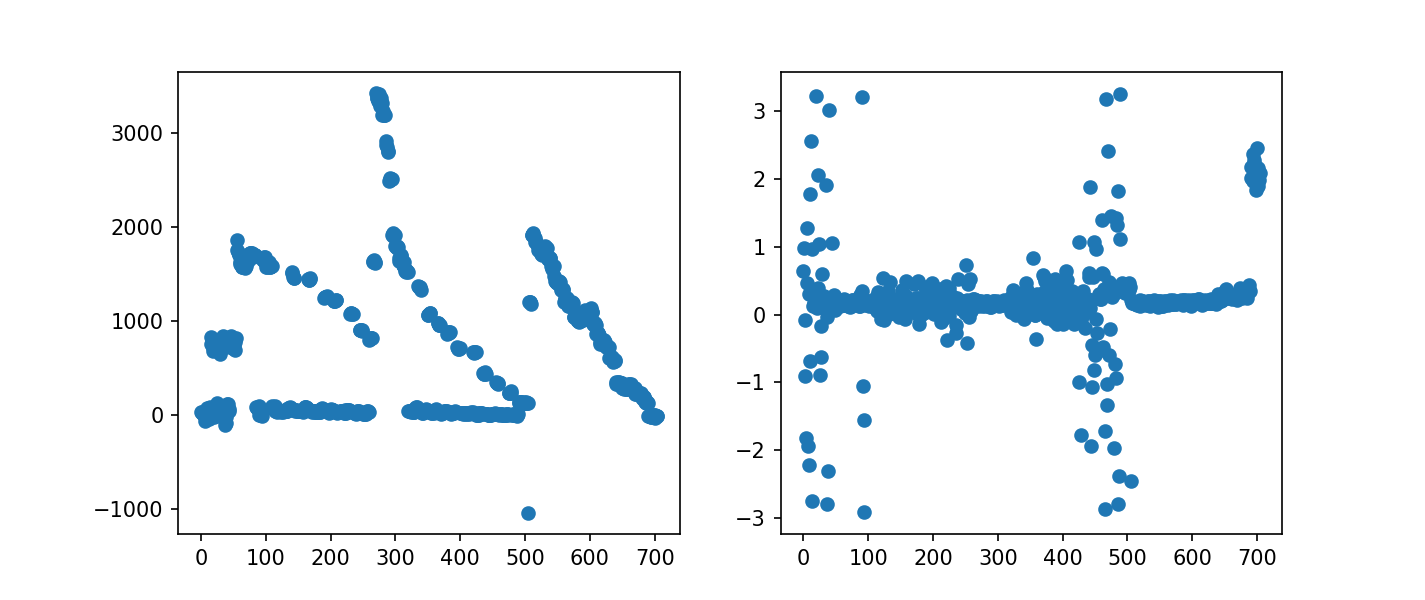

In [14]:
_, ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(len(amps11)), amps11)
# ax[0].scatter(range(len(amps8)), amps82)

ax[1].scatter(range(len(amps11)), phases11)
# ax[1].scatter(range(len(amps5)), phases52)
# ax.scatter(range(len(amps5)), amps52)
# ax.set(ylim=(-3.14, 3.14))

<IPython.core.display.Javascript object>


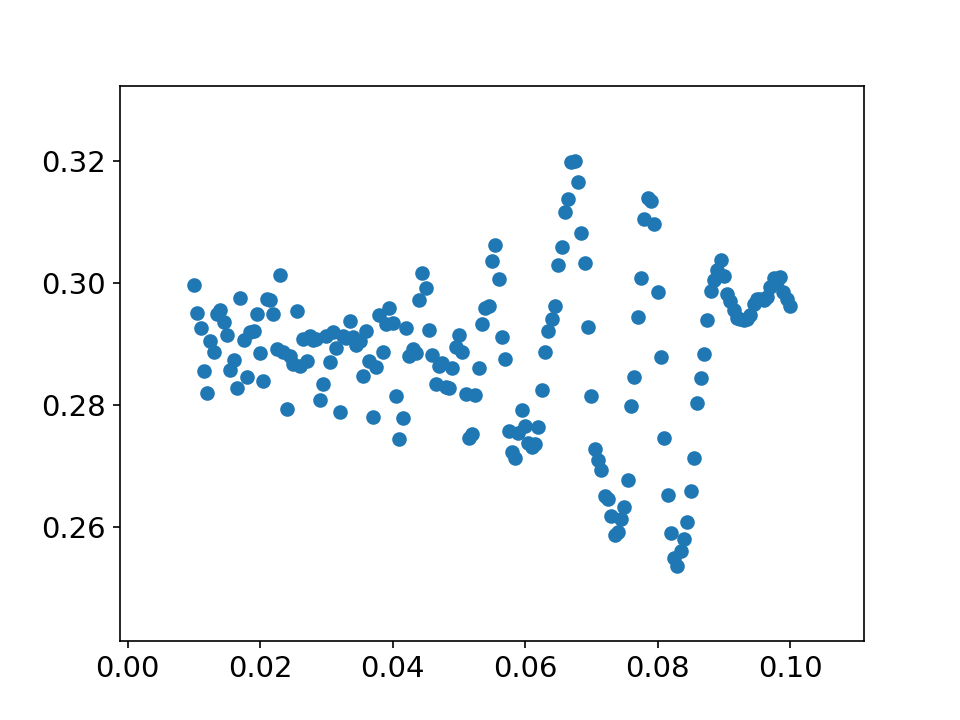

(0.023000000000000013, 0.027500000000000017)

In [324]:
residuals2 = [np.std((amps4[325:]/amps4[-1])/scale_%1) for scale_ in np.arange(0.01,0.1,0.0005)]
scale4 = np.arange(0.01,0.1,0.0005)[np.argmin(residuals2)]
_,ax = plt.subplots()
ax.scatter(np.arange(0.01,0.1,0.0005), residuals2)
scale2, scale3

<IPython.core.display.Javascript object>


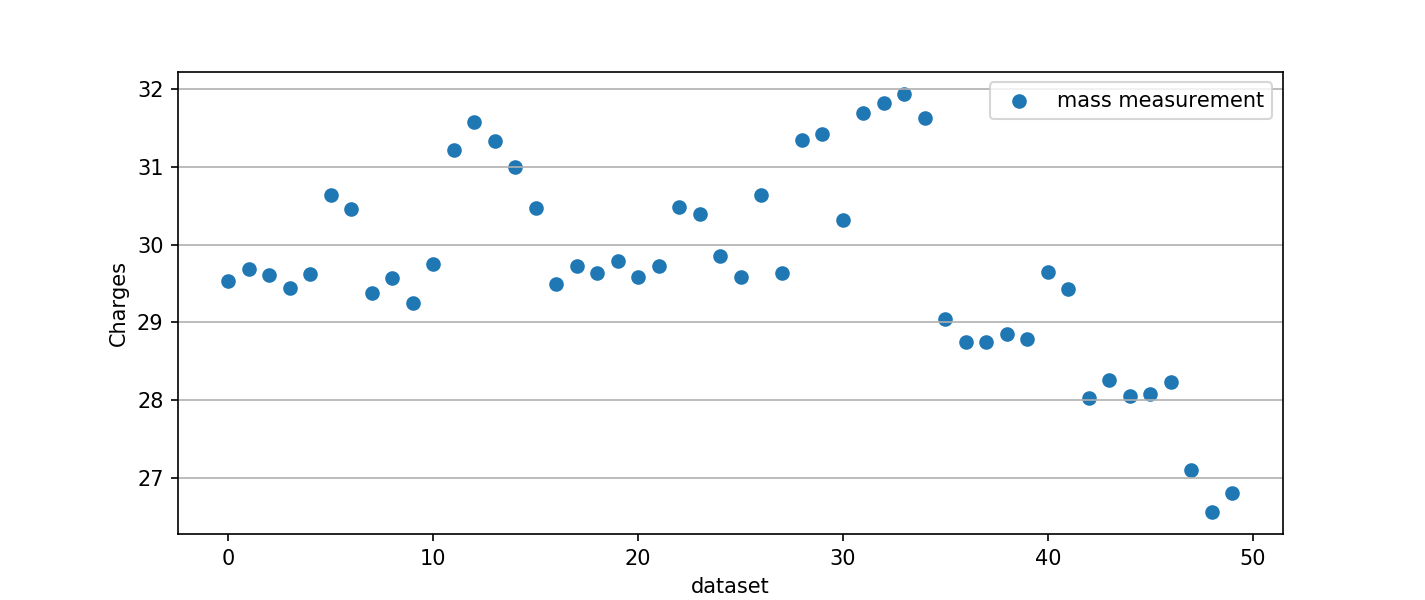

In [45]:
_,ax = plt.subplots(figsize=(9.5,4))
scale = 45.85
extra_scale_plus_to_minus = 1.1
extra_scale_first_discharge = 1.2
extra_scale_perrin = 1.06

# Recharge
# ax.scatter(range(len(amps5)), amps4/scale/extra_scale/extra_scale_recharge*1.1, label='fit fixed-phase')
# ax.scatter(range(len(amps5)), amps5/scale/extra_scale/extra_scale_recharge, label='bimodal fit fixed-phases')

# Recharge_and_Discharge_after_Shaking_20200401
# ax.scatter(range(len(amps6)), amps6/scale/extra_scale/extra_scale_recharge, label='bimodal fit fixed-phases')

# From_plus_to_minus_and_discharge
# ax.scatter(range(len(amps7)), amps7/scale/extra_scale/extra_scale_plus_to_minus/1, label='fit fixed-phase')
# ax.scatter(range(len(amps8)), amps8/scale/extra_scale/extra_scale_plus_to_minus, label='bimodal fit fixed-phases')

# First discharge
# ax.scatter(range(len(amps9)), amps9/scale/extra_scale/extra_scale_first_discharge, label='fit fixed-phase')
# ax.scatter(range(len(amps9)), amps10/scale/extra_scale/extra_scale_first_discharge, label='bimodal fit fixed-phases')

# Perrinf
# ax.scatter(range(len(amps11)), amps11/scale/extra_scale_perrin, label='fit fixed-phase')
# ax.scatter(range(len(amps12)), amps12/scale/extra_scale_perrin, label='bimodal fit fixed-phases')

# Mass
ax.scatter(range(len(amps13)), amps13/scale/1.1, label='mass measurement')

ax.legend()
ax.set(xlabel='dataset', ylabel='Charges', ylim=(None,None), xlim=(None,None))
ax.grid(axis='y')
ax.legend()
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [51]:
bdf_discharge[24].fname

'/data/new_trap/20200320/Bead1/Discharge/From_plus_to_minus_and_discharge/Discharge_744.h5'